<div class="alert alert-block alert-info"><b></b>
<h1><center> <font color='black'> Homework 03</font></center></h1>
<h2><center> <font color='black'> Regression & Regularization</font></center></h2>    
<h2><center> <font color='black'> MTAT.03.319 - Business Data Analytics</font></center></h2>
<h2><center> <font color='black'> University of Tartu - Spring 2023</font></center></h2>
</div>

# Homework instructions

- Please provide the names and student IDs of the team-members (Maximum 2 person) in the field "Team mates" below. If you are not working in a team please insert only your name and student ID.

- Please provide code where ever applicable.

- The accepted submission format is .ipynb file. If you are sharing Colab link, make sure that the privacy settings for the file is public so we can access your code. 

- The submission will automatically close on <font color='red'>**2 April at 23:59**</font>, so please make sure to submit before the deadline. 

- ONLY one of the teammates should submit the homework and in the submission description the other person's Name and Student ID must be entered. We will grade the homework and the marks and feedback is applied for both the team members. So please communicate with your team member about marks and feedback if you are submit the homework.

- If a question is not clear, please ask us in Moodle ONLY. 

- After you have finished solving the Homework, please restart the Kernel and run all the cells to check if there is any persisting issues. 

- Plagiarism is <font color='red'>**PROHIBITED**</font>. Any form of plagiarism will be dealt according to the university policy (https://ut.ee/en/content/academic-fraud).

- <font color='red'>**DO NOT CHANGE THE TEMPLATE**</font>

- <font color='red'>**Restart the Kernel and Run all the cells once again after you are done.**</font>
This will ensure that all the cells run without error. You will find an option in the top menu bar under Kernel tab. 

**<h2><font color='red'>Team mates:</font></h2>**


<font color='red'>Name: Samir Musali</font>&emsp;   <font color='red'>Student ID: C29810</font>


### The homework is divided into four sections and the points are distributed as below:
<pre>
- Classification tasks       -> 9.5 points
- Improving classification   -> 2.5 points
__________________________________________
Total                        -> 12 points
</pre>

# 1. Classification tasks (9.5 points)

We are going to use the dataset from the file HR_Employee_Attrition.csv which contains data about the employees of a company and the fact if they have left the company due to reasons like retirement, resignation, elimination of a position, personal health, etc. It is important for companies to predict if their employees are going to leave because the hiring process is costly and requires planification. The data has the following columns:


Age – self descriptive

BusinessTravel – how frequent employee travels

DailyRate – daily rate on terms of salary

Department – self descriptive

DistanceFromHome – distance between employee home and work

Education – education level of employee

EducationField – self descriptive

EnvironmentSatisfaction – level of satisfaction with working environment

Gender – self descriptive

HourlyRate – self descriptive

JobRole – self descriptive

JobInvolvement – level of interest of the job

JobSatisfaction – level of satisfaction with current job

MaritalStatus – self descriptive

MonthlyIncome – self descriptive

MonthlyRate – self descriptive

NumCompaniesWorked – self descriptive

Over18 – whether customer age is more than 18

OverTime – whether customer works overtime or not

PerformanceRating – performance level of employee

RelationshipSatisfaction – level of satisfaction with working community

StandardHours – standard amount of hours that employee works

TotalWorkingYears – whether customer age is more than 18

TrainingTimesLastYear – whether customer age is more than 18

In [54]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [55]:
hr_data = pd.read_csv('HR_Employee_Attrition.csv', header=0)
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StandardHours,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,80,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,80,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,80,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,80,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,80,6,3,3,2,2,2,2


## 1.1 Dataset exploration (1.7 points)

**1.1.0.
Plot the correlation of the variables against ```Attrition```. (0.5 points)<br>Make sure you perform necessary preprocessing required for the plot.** 

Attrition Map:  {'Yes': 0, 'No': 1}
BusinessTravel Map:  {'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}
Department Map:  {'Sales': 0, 'Research & Development': 1, 'Human Resources': 2}
EducationField Map:  {'Life Sciences': 0, 'Other': 1, 'Medical': 2, 'Marketing': 3, 'Technical Degree': 4, 'Human Resources': 5}
Gender Map:  {'Female': 0, 'Male': 1}




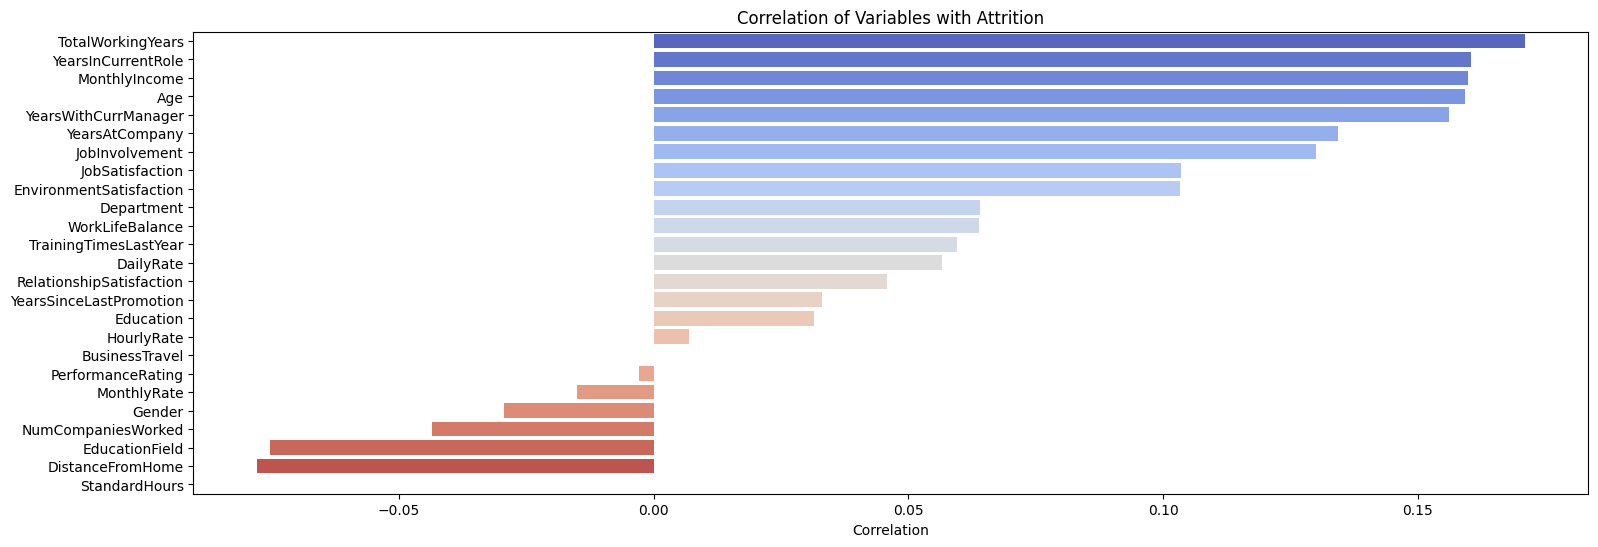

In [56]:
import seaborn as sns

# Convert Attrition to numerical variable
attrition_values = hr_data['Attrition'].unique()
attrition_map = {attrition: i for i, attrition in enumerate(attrition_values)}
print('Attrition Map: ', attrition_map)
hr_data['Attrition'] = hr_data['Attrition'].map(attrition_map)

# Convert BusinessTravel to numerical variable
travel_values = hr_data['BusinessTravel'].unique()
travel_map = {travel: i for i, travel in enumerate(travel_values)}
print('BusinessTravel Map: ', travel_map)
hr_data['BusinessTravel'] = hr_data['BusinessTravel'].map(travel_map)

# Convert Department to numerical variable
department_values = hr_data['Department'].unique()
department_map = {department: i for i, department in enumerate(department_values)}
print('Department Map: ', department_map)
hr_data['Department'] = hr_data['Department'].map(department_map)

# Convert EducationField to numerical variable
education_field_values = hr_data['EducationField'].unique()
education_field_map = {education_field: i for i, education_field in enumerate(education_field_values)}
print('EducationField Map: ', education_field_map)
hr_data['EducationField'] = hr_data['EducationField'].map(education_field_map)

# Convert Gender to numerical variable
gender_values = hr_data['Gender'].unique()
gender_map = {gender: i for i, gender in enumerate(gender_values)}
print('Gender Map: ', gender_map)
hr_data['Gender'] = hr_data['Gender'].map(gender_map)
print('\n')

# Calculate the correlation of variables with Attrition
corr = hr_data.corr()['Attrition'].sort_values(ascending=False)[1:]

# Plot the correlation values as a bar chart
plt.figure(figsize=(18,6))
sns.barplot(x=corr.values, y=corr.index, palette='coolwarm')
plt.title('Correlation of Variables with Attrition')
plt.xlabel('Correlation')
plt.show()

<font color='red'> **Answer:**</font>

**1.1.1. Write three interesting observation that you notice. (0.5 points)**

**<font color='red'>Answer 1: Total Working Years (`TotalWorkingYears`) have the highest positive correlation with attrition, which indicates that employees who have worked for a longer period of time are less likely to leave the company. This observation is in line with the common notion that experienced employees tend to stay longer with a company.</font>** 

**<font color='red'>Answer 2: Distance from Home (`DistanceFromHome`) has the highest negative correlation with attrition, which suggests that employees who live closer to their workplace are less likely to leave the company. This observation is interesting because it indicates that the daily commute can be a significant factor in an employee's decision to leave a company.</font>** 

**<font color='red'>Answer 3: Business Travel (`BusinessTravel`) and Standard Hours (`StandardHours`) have no correlation with attrition, which suggests that they are not significant factors in an employee's decision to leave the company. This observation is interesting because it challenges the assumption that factors such as frequent travel or long working hours can contribute to employee attrition.</font>** 

**1.1.2 Plot a boxplot for ```TotalWorkingYears``` for both Attrition categories. Explain the result. (0.4 points)**

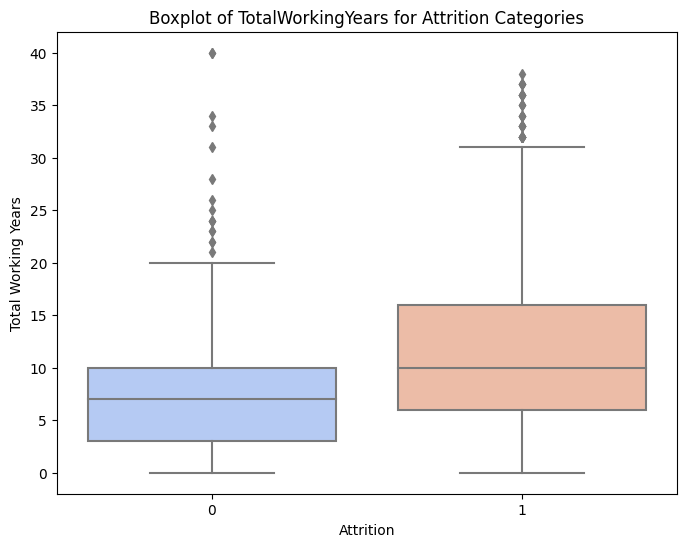

In [57]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=hr_data, palette='coolwarm')
plt.title('Boxplot of TotalWorkingYears for Attrition Categories')
plt.xlabel('Attrition')
plt.ylabel('Total Working Years')
plt.show()

**<font color='red'>Answer: From the boxplot, we can see that the median total working years for employees who left the company (`Attrition = 0` or `Attrition = "Yes"`) is lower than the median for employees who stayed (`Attrition = 1` or `Attrition = "No"`). In addition, the range of total working years for employees who left the company is wider than the range for employees who stayed. This suggests that employees who leave the company tend to have fewer total working years on average than employees who stay. However, there is a significant overlap in the interquartile range (IQR) of the two categories, which suggests that there is no clear-cut difference between the two categories based solely on total working years.</font>** 

**1.1.3. Plot the relative frequency of Attrition values (Yes/No)  (0.3 points)**

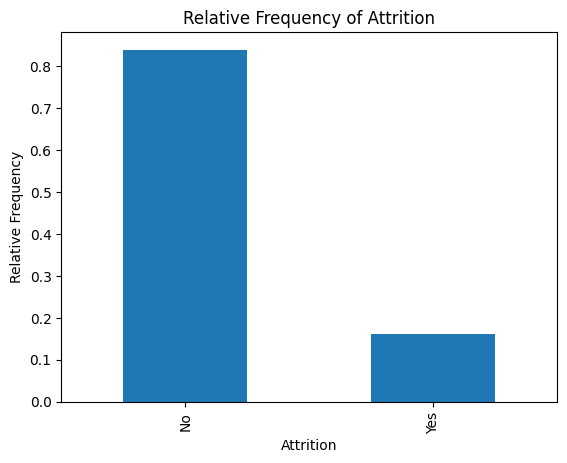

In [58]:
# Map numerical values of Attrition back to original strings
attrition_map_back = {v: k for k, v in attrition_map.items()}
hr_data['Attrition'] = hr_data['Attrition'].replace(attrition_map_back)

# Plot relative frequency of Attrition values
attrition_count = hr_data['Attrition'].value_counts(normalize=True)
attrition_count.plot.bar()
plt.title('Relative Frequency of Attrition')
plt.xlabel('Attrition')
plt.ylabel('Relative Frequency')
plt.show()

<font color='red'> **Answer:**</font>

## 1.2 Classification  (7.8 points)

**1.2.1 We will predict the variable ```Attrition``` by applying different classification algorithms and compare them. But before that we have to split the data into training and test set. And before splitting the dataset, please perform the following preprocessing. (0.5 points)**
* One hot encoding (You probably performed this in ```1.1.0```, in case if you have not)
* Drop three columns with least correlation values. (Use the plot from ```1.1.0```)
* Be a vigilante, and look for columns that has suspicious values. Drop those columns (at least 2 columns), it will not be much of a help in classification.
* Finally normalize the training variables, use the following Z-Score normalizing equation for normalization; <br>

$$x_{norm}= \frac{x -\mu}{\sigma}.$$ <br>

Here, $\mu$ = mean of the training variables, $\sigma$ = standard deviation of the training variables. <br>

What is **Z-score**: It is a a scaling method that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1. It’s useful when there are a few outliers, but not so extreme that you need clipping. Clipping is another technique when you clip off (remove) outliers by visualizing the distribution of your dataset [1]. the following figure shows how Z-score impacts the values, notice the x-axis for both the figures.
<img src="https://developers.google.com/static/machine-learning/data-prep/images/norm-z-score.svg" alt="img" border="0"></a><br />
Ref: https://developers.google.com/machine-learning/data-prep/transform/normalization

In [59]:
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
hr_data.drop(['BusinessTravel', 'StandardHours', 'PerformanceRating'], axis=1, inplace=True)
hr_data.drop(['RelationshipSatisfaction', 'TrainingTimesLastYear'], axis=1, inplace=True)

# Drop attrition and save it as labels
hr_labels = hr_data['Attrition']
hr_data = hr_data.drop(['Attrition'], axis=1)

# Normalize the data
train_data, test_data, train_labels, test_labels = train_test_split(hr_data, hr_labels, test_size=0.2, random_state=42)

train_mean = train_data.select_dtypes(include=np.number).mean()
train_std = train_data.select_dtypes(include=np.number).std()

train_data_norm = (train_data - train_mean) / train_std
test_data_norm = (test_data - train_mean) / train_std

# Replace NaN values with corresponding mean values
train_data_norm.fillna(train_mean, inplace=True)
test_data_norm.fillna(train_mean, inplace=True)

<font color='red'> **Answer:**</font>

**1.2.2 Use the scikit-learn DecisionTreeClassifier with default parameters to predict the attrition value for the test set. Set the random seed to 0. Calculate the accuracy score and print it. (0.5 points)**

In [60]:
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn import metrics

# Train the decision tree classifier
model = DT(random_state=0)
model.fit(train_data_norm, train_labels)

# Predict and calculate accuracy
test_preds = model.predict(test_data_norm)
accuracy = metrics.accuracy_score(test_labels, test_preds)

# Print the Accuracy:
print(f"Accuracy: {accuracy:.2f}")

ValueError: ignored

<font color='red'> **Answer: Can't continue because of (1) the lack of enough time & (2) being unable to fix the issue!**</font>

**1.2.3 Plot the confusion matrix for the predicted values. Why accuracy is not a good metric to use in this case ? (0.4 points)**

**<font color='red'>Answer:</font>**

**1.2.4 Formulate a dumy model (not a machine learning approach) to get 83.88% accuracy. Considering the label ratios how this model would look like? Be creative. You do not require to code for this, just a simple assumption and mathematical proof is necessary. (0.5 points)** <br>
Hint: There are two labels (yes, no) in your data.

**<font color='red'>Answer:</font>**

**1.2.5 Use export_graphviz from sklearn.tree to visualize the trained decision tree of ```1.2.2```. (0.4 points)**

In [ ]:
#!pip3 install graphviz

<font color='red'> **Answer:**</font>

**1.2.6 Look at the visualization, what is the most important factor to decide if an employee is going to leave or not? (0.4 points)**

**<font color='red'>Answer:</font>**


**1.2.7 Plot the classification report for the same decision tree. Which evaluation metrics out of precision and recall, would you consider for this specific case-study? Please elaborate your answer. (0.5 points)**

**<font color='red'>Answer:</font>** 


**1.2.8 Calculate the F1 score of the model in training data and compare it with the F1 score in test  data. What is the phenomenon known as? (0.4 points)**

**<font color='red'>Answer:</font>**

**1.2.9 Use cross validation score to ensure that our model is generalizing well. Try different combinations of maximum depth parameters for the decision tree and choose the best while using cross validation. Please complete the code below and report the best maximum depth. (0.5 points)**

In [ ]:
from sklearn.model_selection import cross_val_score
best_score = 0
best_depth = 0

for i in range(#Low_range,#high_range):
    clf = DT(max_depth=i, random_state = 0)
    #TODO: Perform 5-fold cross validation. 
    #set scoring metrics to f1
    scores = #TODO: initialization
    
    #TODO: calculate the mean score (f1)
    
    #TODO: compare the mea scores to find the best depth
    print('Mean score', mean_score)

print('\n The best tree depth is: ', best_depth )

<font color='red'> **Answer:**</font>

**1.2.10 Use SVM with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. Set the random_state equal to 0. (0.5 points)**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC(random_state=0)

#TODO: train the model
#TODO: predict on test set
#TODO: calculate the metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


<font color='red'> **Answer:**</font>

**1.2.11 Use Logistic Regression with default parameters to classify test data and report accuracy, recall, precision, f1-score, AUC. Set the random_state equal to 0 (0.5 points)**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)

#TODO: train the model
#TODO: predict on test set
#TODO: calculate the metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

<font color='red'> **Answer:**</font>

**1.2.12 One of the parameters for the Logistic regression is tol which sets the tolerance for the stopping criteria. We are going to calculate the log loss metric for different values of tol. Please fill in the code below and plot the log loss values. Which one of tol values is better for our model based on log loss? (0.5 points)**


In [ ]:
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

log_loss = []
for tol in [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]:
    
    #TODO: initialize the model
    #TODO: train the models
    #TODO: predict on test set
    #TODO: calculate logloss
    #TODO: use log_loss list to store the different logloss for different tol
    
tol = [0.9, 0.5, 0.1,  0.001, 0.0001, 0.000001, 0.000001]
plt.plot(tol, log_loss)
plt.ylabel("Log Loss")
plt.xlabel("tol")
plt.show()


#Findidng out the best tolerance value
min_index=(log_loss.index(min(log_loss)))
print("Best Tolerance, tol, Value: ", tol[min_index])

<font color='red'> **Answer:**</font>

**1.2.13 Use Random Forest with default parameters to classify test data and report accuracy, recall, precision and f1-score and AUC. Set the random_state equal to 0. Please build as well a classification report separately which shows the metrics for each class. (0.5 points)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=0)

#TODO: train the model
#TODO: predict on test set
#TODO: classification report

<font color='red'> **Answer:**</font>

**1.2.14 Use the model from ```1.2.13```, calculate the predicted probability on test set. Threshold the probabilities such that it will output the class 'No'  only if the probability is 70% or higher. Otherwise, it will predict 'Yes'. (0.3 points)**


In [ ]:
#TODO: predict probability on test set
#TODO: threshold probability

y_pred_threshold = ... #use this variable to store value

print(y_pred_threshold)

<font color='red'> **Answer:**</font>

**1.2.15 Print the classification report agian. Do you think there were some improvements regarding the classification for class Yes? Explain your answer briefly. (0.4 points)**

In [ ]:
#TODO: Print classification report

**<font color='red'>Answer:</font>** 

**1.2.16 Use XGBoost with default parameters to classify test data and report accuracy, recall, precision, f1-score and AUC. (0.5 points)**

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()

#TODO: train the model
#TODO: predict on test set
#TODO: calculate the metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)

<font color='red'> **Answer:**</font>

**1.2.17 For unbalanced datasets, choose the best classifier (based on evaluation metrics that seems good for this case-study) and plot its feature importances in decreasing order. Were the 3 most important features as you expected, you can use ```1.2.5``` as reference? Please explain why. (0.5 points)**

In [ ]:
#TODO: choose a model
#TODO: train the model

#TODO: predict on test set
#TODO: calculate the metrics

#TODO: feature importance calculation

#TODO: plot the feature importance


**<font color='red'>Answer:</font>**

# 2. Improving classification (2.5 points)

**2.1 Do you think it is better to try oversampling or downsampling in this case study and why ? (0.4 points)** 

**<font color='red'>Answer:</font>** 

**2.2 Apply oversampling to the data while keeping random_state equal to 0. (0.4 points)**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#TODO: apply oversampling

<font color='red'> **Answer:**</font>

**2.3 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Train a random forest model, test it and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
#TODO: split dataset in 80/20 ratio. set random_state=0, use randomforest model from 
#TODO: train a rf model on oversampled data
#TODO: predict on test set
#TODO: calculate metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)


<font color='red'> **Answer:**</font>

**2.4 Apply undersampling to the data while keeping random_state equal to 0. (0.4 points)**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
#TODO: apply undersampling

<font color='red'> **Answer:**</font>

**2.5 Split the data into train/test set with a ratio 80/20. Keep a random_state equal to 0. Use the algorithm chosen in 1.2.12 to classify the test data and report accuracy, precision, recall, f1-score and AUC. (0.5 points)** 

In [ ]:
#TODO: split dataset in 80/20 ratio. set random_state=0, use randomforest model from 
#TODO: train a rf model on undersampled data
#TODO: predict on test set
#TODO: calculate metrics

print('Accuracy: ', acc)
print('Recall: ', rec)
print('Precision: ', prec)
print('F1_score: ', f1_score)
print('AUC: ', auc)



<font color='red'> **Answer:**</font>

**2.6 Which one performed better between over and under sampling (0.3 points)** 

<font color='red'> **Answer:**</font>

## How long did it take you to solve the homework?

* Please answer as precisely as you can. It does not affect your points or grade in any way. It is okay, if it took 0.5 hours or 24 hours. The collected information will be used to improve future homeworks.

<font color='red'> **Answer:**</font>



## What is the level of difficulty for this homework?
you can put only number between $0:10$ ($0:$ easy, $10:$ difficult)

<font color='red'> **Answer:** </font>